<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Analizando el Delito en Chicago

En este caso-taller vamos a utilizar datos geográficos y estimación de densidad de kernel para analizar delitos en Chicago. Esta ciudad es muy famosa no sólo por haber sido el hogar del mafioso Al Capone, sino también por sus altas tasas de delitos. 

Para este taller obtuve datos del portal de la [ciudad de Chicago](https://www.chicago.gov/city/en/dataset/crime.html). La base de datos fue traducida y modificada para nuestras necesidades. Esta contiene todos los homicidios y robos que sucedieron entre el 1 de junio y el 31 de agosto de 2019.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

#### 1.1. Delitos

En la carpeta `data` se encuentra el archivo `Chicago_delitos_verano_2019.csv` cargue estos datos en su *cuaderno*. Describa brevemente el contenido de la base.

In [31]:
import pandas as pd
import geopandas as gpd
from shapely.ops import nearest_points
import folium
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import geojsoncontour
import pickle
from prettytable import PrettyTable

In [32]:
# Utilice este espacio para escribir el código.
df = pd.read_csv("data/Chicago_delitos_verano_2019.csv")
df.head(5)

,fecha,tipo_crimen,nro_area_comunitaria,lat,lon
0,2019-06-01T05:07:00Z,homicidio,23,41.897950,-87.728625
1,2019-06-01T10:09:00Z,homicidio,71,41.753272,-87.648963
2,2019-06-01T12:46:00Z,homicidio,25,41.877622,-87.750728
3,2019-06-01T11:35:00Z,homicidio,16,41.960145,-87.699654
4,2019-06-02T09:39:00Z,homicidio,37,41.804773,-87.633256


In [4]:
df.shape

(17747, 5)

In [5]:
df.dtypes


fecha                    object
tipo_crimen              object
nro_area_comunitaria      int64
lat                     float64
lon                     float64
dtype: object

In [6]:
df.describe

<bound method NDFrame.describe of                       fecha tipo_crimen  nro_area_comunitaria        lat  \
0      2019-06-01T05:07:00Z   homicidio                    23  41.897950   
1      2019-06-01T10:09:00Z   homicidio                    71  41.753272   
2      2019-06-01T12:46:00Z   homicidio                    25  41.877622   
3      2019-06-01T11:35:00Z   homicidio                    16  41.960145   
4      2019-06-02T09:39:00Z   homicidio                    37  41.804773   
...                     ...         ...                   ...        ...   
17742  2019-08-20T18:00:00Z        robo                    77  41.980874   
17743  2019-06-20T17:00:00Z        robo                    77  41.987182   
17744  2019-08-01T05:01:00Z        robo                    25  41.890446   
17745  2019-08-19T05:01:00Z        robo                     8  41.904537   
17746  2019-07-04T05:00:00Z        robo                    22  41.919223   

             lon  
0     -87.728625  
1     -87.64896

#### Procedimiento:
1. Descargar los datos en formato csv.
2. Realizar un head que nos da a entender que el dataframe tiene 5 columnas
3. Con un shape vemos que hay 17747 observacines en la lista y 5 columnas.
4. Exploramos los data types de cada una de las columnas

#### 1.2. Barrios de Chicago

También en la carpeta `data` se encuentran los archivos con los polígonos de las áreas comunitarias en un archivo comprimido llamado `Areas_comunitarias_Chicago.zip`. Genere un mapa interactivo con un popup con el nombre del area comunitaria.

In [7]:
# Utilice este espacio para escribir el código.
areas = gpd.read_file("data/Areas/")
areas.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [8]:
areas.shape

(77, 10)

In [9]:
map = folium.Map(location = [41.881998,-87.627800], tiles = "OpenStreetMap", zoom_start = 10)

for _, r in areas.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['community']).add_to(geo_j)
    geo_j.add_to(map)

map

(Utilice este espacio para describir su procedimiento).

### 2.   Análisis distribución del crimen por barrios

#### 2.1.  Genere una tabla descriptiva donde se muestra el número total de delitos, el número total de robos y el número total de homicidios, y como porcentaje de total por barrios. La tabla debe contener ademas una fila final donde se muestre el total para la ciudad. Describa los resultados que obtiene.


In [10]:
# Buscar cuales tipos de delitos existen
unique = df.tipo_crimen.unique()
print('Tipos de delitos:', unique)

# Busco cuantos números totales de robos hay
# count values
print('Número total de robos:', df['tipo_crimen'].value_counts()['robo'])
 
# count values
print('Número total de homicidios:', df['tipo_crimen'].value_counts()['homicidio'])


Tipos de delitos: ['homicidio' 'robo']
Número total de robos: 17603
Número total de homicidios: 144


In [19]:
# Creo un diccionario para poner el tipo de crimen y area
crime_counts = {}

# Loop que itera 
for crime, area in zip(df['tipo_crimen'], df['nro_area_comunitaria']):
    if (crime, area) not in crime_counts:
        crime_counts[(crime, area)] = 1
    else:
        crime_counts[(crime, area)] += 1

# Calculo el numero total por area de cada delito
total_counts_per_area = {}
for (crime, area), count in crime_counts.items():
    if area not in total_counts_per_area:
        total_counts_per_area[area] = count
    else:
        total_counts_per_area[area] += count

# Calculo porcentajes
crime_percentages = {}
for (crime, area), count in crime_counts.items():
    percentage = (count / total_counts_per_area[area]) * 100
    crime_percentages[(crime, area)] = percentage
    

# Calculate the total counts for the city
total_counts_city = sum(count for count in crime_counts.values())

# Calculate total percentages for the city
total_percentage_city = total_counts_city / len(df['tipo_crimen'])

# Creo la tabla
table = PrettyTable()
                            
# Defino las columnas
table.field_names = ["Área Comunitaria", "Tipo de Crimen", "Porcentaje"]
table.align["Área Comunitaria"] = "l"
table.align["Tipo de Crimen"] = "l"
table.align["Porcentaje"] = "r"

# Agrego los datos
for (crime, area), percentage in crime_percentages.items():
    table.add_row([f"{area}", f"{crime}", f"{percentage:.2f}%"])


# Add the total row for the city
table.add_row(["Total Ciudad", "", f"{total_percentage_city:.2f}%"])

# Print the table
print("Porcentaje de cada tipo de crimen por área comunitaria:")
print(table)

Porcentaje de cada tipo de crimen por área comunitaria:
+------------------+----------------+------------+
| Área Comunitaria | Tipo de Crimen | Porcentaje |
+------------------+----------------+------------+
| 23               | homicidio      |      3.63% |
| 71               | homicidio      |      1.19% |
| 25               | homicidio      |      2.19% |
| 16               | homicidio      |      0.51% |
| 37               | homicidio      |      4.00% |
| 7                | homicidio      |      0.57% |
| 27               | homicidio      |      2.49% |
| 24               | homicidio      |      0.13% |
| 40               | homicidio      |      5.43% |
| 29               | homicidio      |      4.15% |
| 42               | homicidio      |      1.20% |
| 30               | homicidio      |      1.90% |
| 52               | homicidio      |      5.13% |
| 49               | homicidio      |      2.53% |
| 68               | homicidio      |      1.80% |
| 61               | homic

#### Procedimiento:

1. Calculamos los estadísticas generales: a) Exploramos cuáles son los tipos de delitos que se consideran, b) Exploramos cuántos delitos por homicidio hay en total y c) Exploramos cuántos delitos por robo hay en total
2. Creo un diccionario 
3. Calculamos el número total de delitos por área
4. Calculamos los porcentaje de homicidios por area
5. Creamos una tabla para representar las estadísticas


#### Análisis y conclusiones:

La mayoría de los delitos que se realizan no solamente en Chicago si no en  los barrios son robos.

#### 2.2. Genere una gráfica de dispersión entre el total de homicidios y robos por barrios. Incluya en la gráfica la recta de regresión que mejor ajusta a esos datos. Describa los resultados que obtiene.

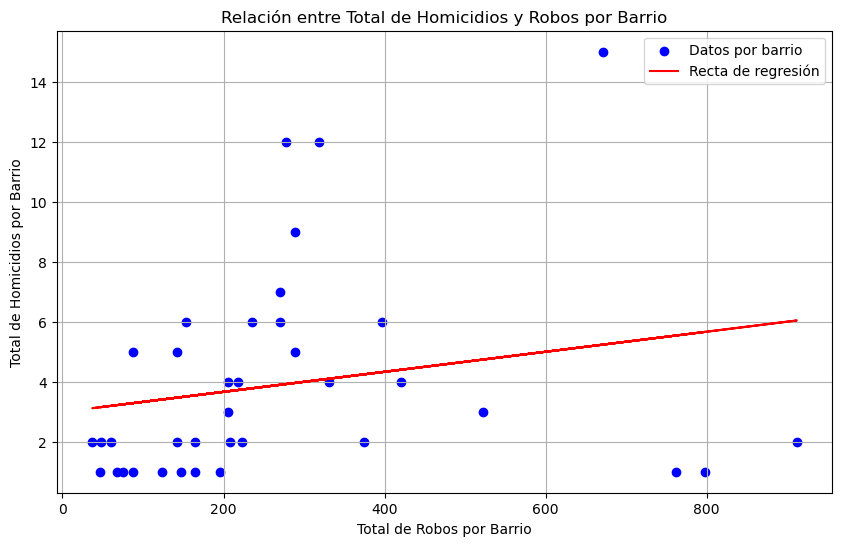

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


# Calcular total de homicidios y robos
total_homicidios = df[df['tipo_crimen'] == 'homicidio'].groupby('nro_area_comunitaria').size()
total_robos = df[df['tipo_crimen'] == 'robo'].groupby('nro_area_comunitaria').size()

# Buscar que ambos indexes coincidan, si no, rellenar con 0
total_robos = total_robos.reindex(total_homicidios.index, fill_value=0)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_robos, total_homicidios, color='blue', label='Datos por barrio')

# Reshape
total_robos = total_robos.values.reshape(-1, 1)

# Regresión
regression_model = LinearRegression()
regression_model.fit(total_robos, total_homicidios)
predicted_homicidios = regression_model.predict(total_robos)

# Plot the regression line
plt.plot(total_robos, predicted_homicidios, color='red', label='Recta de regresión')

# Labels and title
plt.xlabel('Total de Robos por Barrio')
plt.ylabel('Total de Homicidios por Barrio')
plt.title('Relación entre Total de Homicidios y Robos por Barrio')

plt.legend()
plt.grid(True)
plt.show()

#### Procedimiento:

1. Calcular total de homicidios y robos
2. Buscar que ambos indexes coincidan, si no, rellenar con 0
3. Realizar el scatterplot
4. Regresión
5. Mostrar resultados

#### Análisis y conclusiones:

Se puede ver que hay una concentración de los datos cerca al lado izquierdo de la gráfica y la recta de regresión parece mostrar una relación incremental entre robos y homicidios.

### 3. Distribución espacial del delito

#### 3.1 Distribución respecto al centro de la ciudad

Tomando como centro de la ciudad las coordenadas (-87.627800, 41.881998), estime funciones de densidad que muestren gráficamente el gradiente del total de robos, y homicidios, como función de la distancia al centro de la ciudad. Explique cómo midió las distancias incluyendo que medida de distancia utilizó. Para elegir el ancho de banda y la función de kernel más apropiados utilice validación cruzada usando todas las opciones posibles de kernel. Describa los resultados que obtiene.

In [33]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Coordenadas del centro de la ciudad
centro_ciudad = (-87.627800, 41.881998)

df_robo_y_homicidios = df.loc[(df["tipo_crimen"] == "robo") | (df["tipo_crimen"] == "homicidio")]

In [34]:
## Se define el punto del centro de la ciudad

CC = pd.DataFrame({
    "lugar": ["Centro de la Ciudad"],
    "Lat": [41.881998],
    "Lon": [-87.627800]
    })
CC

,lugar,Lat,Lon
0,Centro de la Ciudad,41.881998,-87.6278


In [35]:
## Se definen las caracteristicas del mapa

import folium

map = folium.Map(location = [df['lat'].mean(),df['lon'].mean()], tiles = "OpenStreetMap", zoom_start = 10)

In [36]:
## Se muestra el centro

folium.Marker(
      location=[CC.iloc[0]['Lat'], CC.iloc[0]['Lon']]
).add_to(map)
map

In [37]:
## Se ponen las coordenadas

import geopandas as gpd

df_robo_y_homicidios = gpd.GeoDataFrame(df_robo_y_homicidios, geometry = gpd.points_from_xy(df_robo_y_homicidios.lon, df_robo_y_homicidios.lat))
df.crs = "EPSG:4326"

df_robo_y_homicidios["coordenadas"] = df_robo_y_homicidios["geometry"].apply(lambda x: x.representative_point().coords[:][0])

In [38]:
## Se verifica 
df_robo_y_homicidios.head()

,fecha,tipo_crimen,nro_area_comunitaria,lat,lon,geometry,coordenadas
0,2019-06-01T05:07:00Z,homicidio,23,41.897950,-87.728625,POINT (-87.72863 41.89795),"(-87.728625471, 41.897949791)"
1,2019-06-01T10:09:00Z,homicidio,71,41.753272,-87.648963,POINT (-87.64896 41.75327),"(-87.648962792, 41.753272058)"
2,2019-06-01T12:46:00Z,homicidio,25,41.877622,-87.750728,POINT (-87.75073 41.87762),"(-87.750727697, 41.877622161)"
3,2019-06-01T11:35:00Z,homicidio,16,41.960145,-87.699654,POINT (-87.69965 41.96015),"(-87.699653761, 41.960145088)"
4,2019-06-02T09:39:00Z,homicidio,37,41.804773,-87.633256,POINT (-87.63326 41.80477),"(-87.633256046, 41.804772841)"


In [39]:
## Se ponen las coordenadas del centro

CC = gpd.GeoDataFrame(CC, geometry = gpd.points_from_xy(CC.Lon, CC.Lat))
CC.crs = "EPSG:4326"
CC["coordenadas"] = CC["geometry"].apply(lambda x: x.representative_point().coords[:][0])


## Se verifica
CC

,lugar,Lat,Lon,geometry,coordenadas
0,Centro de la Ciudad,41.881998,-87.6278,POINT (-87.62780 41.88200),"(-87.6278, 41.881998)"


In [40]:
## Con base en las coordenadas calculadas anteriores se mide la distancia

from geopy.distance import geodesic

distances = []

for p in range(df_robo_y_homicidios.shape[0]):
    punto = df_robo_y_homicidios.coordenadas[p]
    distancia = geodesic(
            (CC.coordenadas[:][0][1], CC.coordenadas[:][0][0]),
            (punto[1], punto[0])).km
    distances.append(distancia)
    
df_robo_y_homicidios['distancias'] = distances

df_robo_y_homicidios.head()

,fecha,tipo_crimen,nro_area_comunitaria,lat,lon,geometry,coordenadas,distancias
0,2019-06-01T05:07:00Z,homicidio,23,41.897950,-87.728625,POINT (-87.72863 41.89795),"(-87.728625471, 41.897949791)",8.553361
1,2019-06-01T10:09:00Z,homicidio,71,41.753272,-87.648963,POINT (-87.64896 41.75327),"(-87.648962792, 41.753272058)",14.405275
2,2019-06-01T12:46:00Z,homicidio,25,41.877622,-87.750728,POINT (-87.75073 41.87762),"(-87.750727697, 41.877622161)",10.215364
3,2019-06-01T11:35:00Z,homicidio,16,41.960145,-87.699654,POINT (-87.69965 41.96015),"(-87.699653761, 41.960145088)",10.529419
4,2019-06-02T09:39:00Z,homicidio,37,41.804773,-87.633256,POINT (-87.63326 41.80477),"(-87.633256046, 41.804772841)",8.589379


c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using scott for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distancias', ylabel='Density'>

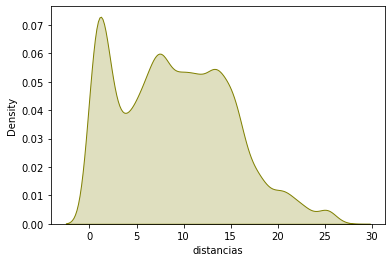

In [41]:
## Se estiman densidades
import seaborn as sns

sns.kdeplot(df_robo_y_homicidios['distancias'], shade=True, bw='scott', color="olive")

In [42]:
## Se estiman los posibles anchos de banda

bandwidths = 10 ** np.linspace(-2, .001, 20)
bandwidths[0:20]

array([0.01      , 0.01274429, 0.0162417 , 0.0206989 , 0.02637929,
       0.03361855, 0.04284447, 0.05460225, 0.06958671, 0.08868335,
       0.11302067, 0.14403687, 0.18356483, 0.23394042, 0.29814055,
       0.37995909, 0.48423105, 0.61711829, 0.78647371, 1.00230524])

In [43]:
## Se realiza validación cruzada

grid = { 
    'bandwidth': bandwidths,
    'kernel': ['gaussian','epanechnikov', 'tophat', 'linear']
}

gridCV = GridSearchCV(KernelDensity(),
                    param_grid=grid,
                    cv=5,verbose=0)
vals=df_robo_y_homicidios['distancias'].to_numpy().reshape(-1, 1)
gridCV.fit(vals)

c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-10573.36399246            -inf            -inf            -inf
 -10574.49819776            -inf            -inf            -inf
 -10590.98933037            -inf            -inf            -inf
 -10615.94712688            -inf            -inf            -inf
 -10645.39272248            -inf            -inf            -inf
 -10677.69895353            -inf            -inf            -inf
 -10710.28331591            -inf            -inf            -inf
 -10737.87606569            -inf            -inf            -inf
 -10757.48774994            -inf            -inf            -inf
 -10770.64884356            -inf            -inf            -inf
 -10780.23570012 -10766.00980188 -10817.8896792  -10721.76662783
 -10789.00783091 -10775.85252572 -10788.61584171 -10742.14723069
 -10798.99750689 -10780.78315387 -10800.92554476 -10755.7021

GridSearchCV(cv=5, estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.01      , 0.01274429, 0.0162417 , 0.0206989 , 0.02637929,
       0.03361855, 0.04284447, 0.05460225, 0.06958671, 0.08868335,
       0.11302067, 0.14403687, 0.18356483, 0.23394042, 0.29814055,
       0.37995909, 0.48423105, 0.61711829, 0.78647371, 1.00230524]),
                         'kernel': ['gaussian', 'epanechnikov', 'tophat',
                                    'linear']})

In [44]:
## Se verifican los mejores parametros encontrados
gridCV.best_params_

{'bandwidth': 0.01, 'kernel': 'gaussian'}

c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\Felipe\anaconda3\envs\Financiero\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


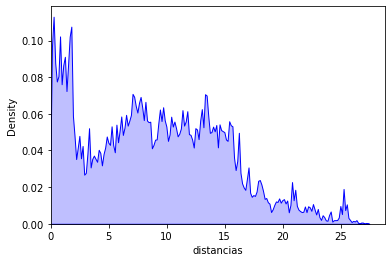

In [45]:
## Se gráfica la densidad
sns.kdeplot(df_robo_y_homicidios['distancias'], shade=True, bw=0.01, kernel='gaussian', color="blue")
plt.xlim(0, None)
plt.show()

#### Procedimiento:

1. Se crea un df con los homicidios y robos y con la ubicación del centro de la ciudad.
2. Se guardan estas coordenadas con geopy.
3. Se cálcula la distancia usando geopy.distance
4. Con base en estas distancias se usa validación cruzada para obtener los mejores parametros.
5. Se gráfican los resultados.

#### Análisis y conclusiones:

Como se puede observar la densidad de crimenes y robos parace ser mucho más alta mientras más cerca se este del centro de la ciudad esto puede ser consecuencia del hecho de  que el centro de las ciudades usualmente es el hub economico lo que implica que sea por lo tanto la zona con mayor riesgo.

### 3.2 Puntos calientes en la ciudad

Usando `statsmodels` implemente la estimación de densidad bivariada para el total de robos y el total de homicidios. Muestre los resultados usando curvas de nivel en una visualización interactiva. Compare los resultados de estimar usando los anchos de banda: `normal_reference` y `cv_ml`. Explique en que consisten ambas formas de estimar el ancho de banda. Comente sobre los puntos calientes encontrados bajo ambos métodos y su ubicación en la ciudad. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [ ]:
df_robo = df[df["tipo_crimen"]=="robo"]
df_robo.head()

,fecha,tipo_crimen,nro_area_comunitaria,lat,lon
144,2019-06-01T05:05:00Z,robo,38,41.808910,-87.616577
145,2019-06-01T05:30:00Z,robo,26,41.879814,-87.721559
146,2019-06-01T05:00:00Z,robo,3,41.969046,-87.658065
147,2019-06-01T05:02:00Z,robo,43,41.767848,-87.566499
148,2019-06-01T05:57:00Z,robo,45,41.743970,-87.585797


In [ ]:
df_homicidio = df[df["tipo_crimen"]=="homicidio"]
df_homicidio.head()

,fecha,tipo_crimen,nro_area_comunitaria,lat,lon
0,2019-06-01T05:07:00Z,homicidio,23,41.897950,-87.728625
1,2019-06-01T10:09:00Z,homicidio,71,41.753272,-87.648963
2,2019-06-01T12:46:00Z,homicidio,25,41.877622,-87.750728
3,2019-06-01T11:35:00Z,homicidio,16,41.960145,-87.699654
4,2019-06-02T09:39:00Z,homicidio,37,41.804773,-87.633256


In [ ]:
# Utilice este espacio para escribir el código.
db_robo = df_robo[["lat", "lon"]]
dens_u = sm.nonparametric.KDEMultivariate(data=db_robo, var_type='cc', bw='cv_ml')
dens_u.bw

C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
C:\Users\JD_01\AppData\Roaming\Python\Python311\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


array([0.00013767, 0.00565121])

In [ ]:
with open('Pickle/dense_u_robo.pkl', 'wb') as archivo_pkl:
    pickle.dump(dens_u, archivo_pkl)

In [ ]:
with open('Pickle/dense_u_robo.pkl', 'rb') as archivo_pkl:
    dens_u_robo = pickle.load(archivo_pkl)
dens_u_robo.bw

array([0.00013767, 0.00565121])

In [ ]:
x = np.linspace(min(db_robo.lon), max(db_robo.lon), 200)
y = np.linspace(min(db_robo.lat), max(db_robo.lat), 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack(( yy.flatten(),xx.flatten()))
grid

array([[ 41.64460772, -87.91764464],
       [ 41.64460772, -87.91567479],
       [ 41.64460772, -87.91370495],
       ...,
       [ 42.02253638, -87.52958504],
       [ 42.02253638, -87.5276152 ],
       [ 42.02253638, -87.52564535]])

In [ ]:
densidad_pred=dens_u_robo.pdf(data_predict=grid)

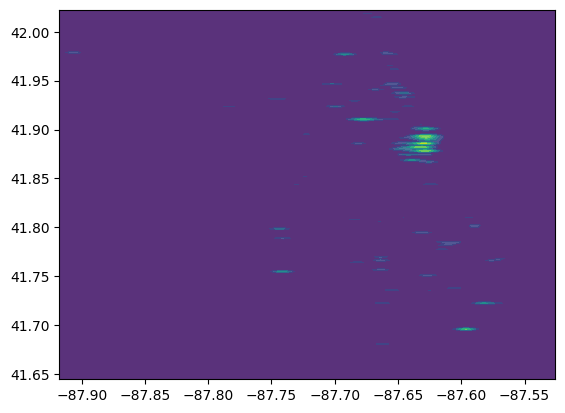

In [ ]:
contourf = plt.contourf(xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.9, linestyles='None')
                        
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

In [ ]:
map1 = folium.Map(location = [41.881998,-87.627800], tiles = "OpenStreetMap", zoom_start = 10)
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': '#FFFFFF',
        'lineColor': '#FFFFFF',
        'opacity':   0.5,
    }).add_to(map1)

for _, r in areas.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['community']).add_to(geo_j)
    geo_j.add_to(map1)

map1

In [ ]:
dens_u_robo_nr = sm.nonparametric.KDEMultivariate(data=db_robo, var_type='cc', bw='normal_reference')
dens_u_robo_nr.bw

array([0.01700125, 0.01141213])

In [ ]:
x_robo_nr = np.linspace(min(db_robo.lon), max(db_robo.lon), 200)
y_robo_nr = np.linspace(min(db_robo.lat), max(db_robo.lat), 200)
xx_robo_nr, yy_robo_nr = np.meshgrid(x_robo_nr, y_robo_nr)
grid_robo_nr = np.column_stack(( yy_robo_nr.flatten(),xx_robo_nr.flatten()))
grid_robo_nr

array([[ 41.64460772, -87.91764464],
       [ 41.64460772, -87.91567479],
       [ 41.64460772, -87.91370495],
       ...,
       [ 42.02253638, -87.52958504],
       [ 42.02253638, -87.5276152 ],
       [ 42.02253638, -87.52564535]])

In [ ]:
densidad_pred_robo_nr=dens_u_robo_nr.pdf(data_predict=grid_robo_nr)

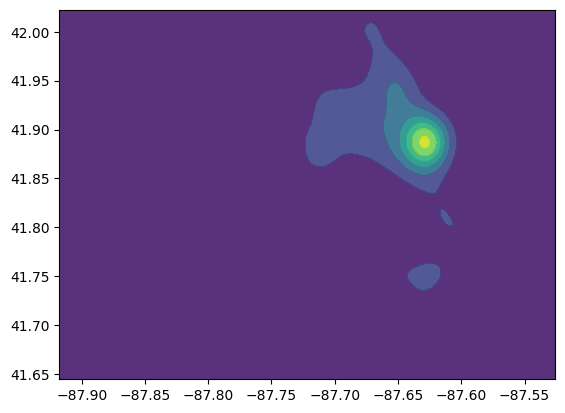

In [ ]:
contourf_robo_nr = plt.contourf(xx_robo_nr, yy_robo_nr, densidad_pred_robo_nr.reshape(xx_robo_nr.shape),
    alpha =0.9, linestyles='None')
                        
geojson_robo_nr = geojsoncontour.contourf_to_geojson(
    contourf=contourf_robo_nr,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

In [ ]:
map1_robo_nr = folium.Map(location = [41.881998,-87.627800], tiles = "OpenStreetMap", zoom_start = 10)
folium.GeoJson(
    geojson_robo_nr,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': '#FFFFFF',
        'lineColor': '#FFFFFF',
        'opacity':   0.5,
    }).add_to(map1_robo_nr)

for _, r in areas.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['community']).add_to(geo_j)
    geo_j.add_to(map1_robo_nr)

map1_robo_nr

In [ ]:
# Utilice este espacio para escribir el código.
db_homicidio = df_homicidio[["lat", "lon"]]
dens_u_homicidio = sm.nonparametric.KDEMultivariate(data=db_homicidio, var_type='cc', bw='cv_ml')
dens_u_homicidio.bw

array([0.01405423, 0.01054009])

In [ ]:
x = np.linspace(min(db_homicidio.lon), max(db_homicidio.lon), 200)
y = np.linspace(min(db_homicidio.lat), max(db_homicidio.lat), 200)
xx, yy = np.meshgrid(x, y)
grid = np.column_stack(( yy.flatten(),xx.flatten()))
grid

array([[ 41.67803875, -87.76792469],
       [ 41.67803875, -87.76672587],
       [ 41.67803875, -87.76552706],
       ...,
       [ 42.01896697, -87.53175757],
       [ 42.01896697, -87.53055875],
       [ 42.01896697, -87.52935993]])

In [ ]:
densidad_pred=dens_u_homicidio.pdf(data_predict=grid)

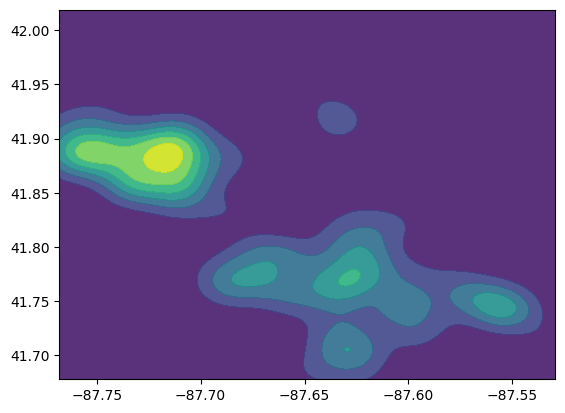

In [ ]:
contourf = plt.contourf(xx, yy, densidad_pred.reshape(xx.shape),
    alpha =0.9, linestyles='None')
                        
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

In [ ]:
map2 = folium.Map(location = [41.881998,-87.627800], tiles = "OpenStreetMap", zoom_start = 10)
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': '#FFFFFF',
        'lineColor': '#FFFFFF',
        'opacity':   0.5,
    }).add_to(map2)

for _, r in areas.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['community']).add_to(geo_j)
    geo_j.add_to(map2)

map2

In [ ]:
# Utilice este espacio para escribir el código.
dens_u_homicidio_nr = sm.nonparametric.KDEMultivariate(data=db_homicidio, var_type='cc', bw='normal_reference')
dens_u_homicidio_nr.bw

array([0.03365809, 0.02809606])

In [ ]:
x_homicidio_nr = np.linspace(min(db_homicidio.lon), max(db_homicidio.lon), 200)
y_homicidio_nr = np.linspace(min(db_homicidio.lat), max(db_homicidio.lat), 200)
xx_homicidio_nr, yy_homicidio_nr = np.meshgrid(x_homicidio_nr, y_homicidio_nr)
grid_homicidio_nr = np.column_stack(( yy_homicidio_nr.flatten(),xx_homicidio_nr.flatten()))
grid_homicidio_nr

array([[ 41.67803875, -87.76792469],
       [ 41.67803875, -87.76672587],
       [ 41.67803875, -87.76552706],
       ...,
       [ 42.01896697, -87.53175757],
       [ 42.01896697, -87.53055875],
       [ 42.01896697, -87.52935993]])

In [ ]:
densidad_pred_homicidio_nr=dens_u_homicidio_nr.pdf(data_predict=grid_homicidio_nr)

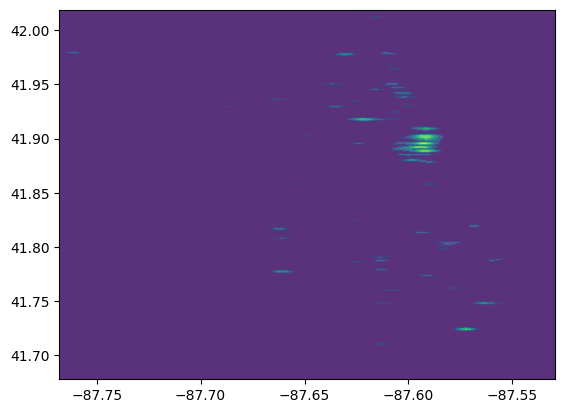

In [ ]:
contourf_homicidio_nr = plt.contourf(xx_homicidio_nr, yy_homicidio_nr, densidad_pred.reshape(xx_homicidio_nr.shape),
    alpha =0.9, linestyles='None')
                        
geojson_homicidio_nr = geojsoncontour.contourf_to_geojson(
    contourf=contourf_homicidio_nr,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)

In [ ]:
map2_homicidio_nr = folium.Map(
    location=[41.881998, -87.627800], tiles="OpenStreetMap", zoom_start=10)
folium.GeoJson(
    geojson_homicidio_nr,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': '#FFFFFF',
        'lineColor': '#FFFFFF',
        'opacity':   0.5,
    }).add_to(map2_homicidio_nr)

for _, r in areas.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': '#FFFFFF'})
    folium.Popup(r['community']).add_to(geo_j)
    geo_j.add_to(map2_homicidio_nr)

map2_homicidio_nr

Procedimiento
1. Definir `df_robo` y `df_homicidio` tomando las columnas de lat y lon.
2. Usar la función `KDEMultivariate` para obtener los kernel para cada uno de los casos:
* Robo con Bandwidth 'cv_ml'
* Robo con Bandwidth 'normal_reference'
* Homicidio con Bandwidth 'cv_ml'
* Homicidio con Bandwidth 'normal_reference'
3. Solo para el caso de robo con `bw='cv_ml'` se guarda en un Pickle, dado que el tiempo de ejecución es considerable.
4. Crear la cuadrícula de coordenadas para luego hallar su `pdf`.
5. Una vez se obtiene el `pdf`, se procede a crear el geojson, que hará parte de una capa del mapa, para así formar cuatro mapas para cada uno de los escenarios del punto 2.


Análisis y Conclusiones
* Se puede concluir que los robos están centrados en `NEAR NORTH SIDE` y `LOOP`, en los dos escenarios con `cv_ml` y `normal_reference`. En cuanto a los homicidios se puede concluir que se centran en los puntos `EAST GARFIELD PARK` y `WEST GARFIELD PARK`, aunque también se encuentran dos zonas como `SOUTH CHICAGO` y `WEST ENGLEWOOD`.
* Si bien `normal_reference` se usa asumiendo que los datos provienen de una distribución normal, puede no ser la mejor opción si los datos no se ajustan bien a una distribución normal; mientras que `cv_ml` es más robusto dado que no se basa en suposiciones sobre la distribución de los datos. La desventaja de `cv_ml` con respecto a `normal_reference` radica en el costo computacional.

## 4. Explicando la ubicación del delito

El objetivo de este punto es encontrar posibles correlaciones  entre el crimen y características de la ciudad. Para ello, utilice los datos de OpenStreetMap y explore si existe una correlación entre el porcentaje del área de la comunidad  dedicado a tiendas (`retail`)  y comercios (`commercial`) y el número total de robos y homicidios en esa comunidad. Ofrezca una explicación intuitiva de por qué cree que aparecen estas correlaciones. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [64]:
#Utilice este espacio para escribir el código.

from pyrosm import OSM, get_data
# Bajamos los datos para  Chicago
fp = get_data("Chicago")

# Inicializamos el lector para Chicago
osm = OSM(fp)

In [65]:
## Se agrega una linea extra por un problema con numpy

np.float = float        

# Obtenemos los datos de los puntos de interés (POI) con un filtro personalizado
retailco = osm.get_pois(custom_filter={'landuse': ['commercial']})


TypeError: Input must be valid geometry objects: POLYGON ((-87.774 42.012, -87.774 42.012, -87.774 42.01, -87.772 42.01, -87.772 42.01, -87.772 42.01, -87.773 42.011, -87.773 42.011, -87.773 42.012, -87.773 42.012, -87.773 42.012, -87.773 42.012, -87.773 42.012, -87.773 42.012, -87.774 42.012))

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)